In [1]:
import numpy as np
import matplotlib.pyplot as plt

##Linear Regression

Theta is  [[4.0411387 ]
 [3.07949735]]


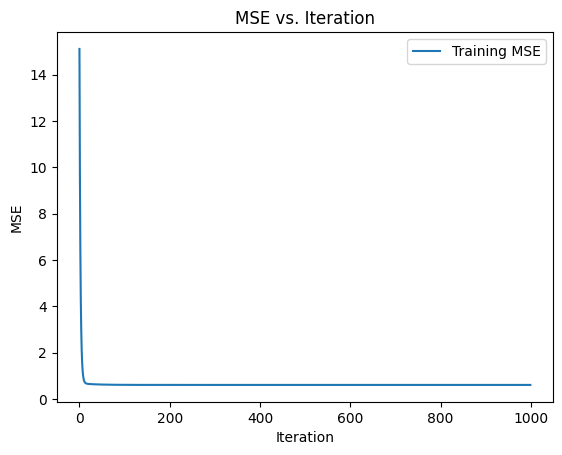

Training Error: 0.6068484252574063
Validation Error: 0.40295265066239494
The model seems fine.


In [5]:
# 1. Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

# 2. Split data
indices = np.random.permutation(len(X))
train_idx, test_idx, valid_idx = indices[:60], indices[60:80], indices[80:]
X_train, X_test, X_valid = X[train_idx], X[test_idx], X[valid_idx]
y_train, y_test, y_valid = y[train_idx], y[test_idx], y[valid_idx]

# 3. Define Linear Regression with L2 regularization
def compute_cost(X, y, theta, lambda_reg):
    m = len(X)
    prediction = X.dot(theta) # X * theta = y
    regularizer = (lambda_reg/(2*m)) * np.sum(np.square(theta))
    return (1/(2*m)) * np.sum(np.square(prediction - y)) + regularizer


def gradient_descent(X, y, theta, learning_rate, num_iterations, lambda_reg):
    m = len(X)
    cost_history = np.zeros(num_iterations)
    for i in range(num_iterations):
        gradients = (1/m) * X.T.dot(X.dot(theta) - y) + (lambda_reg/m) * theta
        theta -= learning_rate * gradients
        cost_history[i] = compute_cost(X, y, theta, lambda_reg)
    return theta, cost_history


def r_squared(y_true, y_pred):
    # Impelement r-squared
    pass

# 4. Train the model
m = len(X_train)
X_b_train = np.c_[np.ones((m, 1)), X_train]
X_b_valid = np.c_[np.ones((len(X_valid), 1)), X_valid]
initial_theta = np.random.randn(2, 1)
learning_rate = 0.1
num_iterations = 1000
lambda_reg = 0.1

theta, cost_history = gradient_descent(X_b_train, y_train, initial_theta, learning_rate, num_iterations, lambda_reg)
train_predictions = X_b_train.dot(theta)
valid_predictions = X_b_valid.dot(theta)
print("Theta is ", theta)

# 5. Check datasets
print(f"R^2 for training data: {r_squared(y_train, train_predictions)}")
print(f"R^2 for validation data: {r_squared(y_valid, valid_predictions)}")

# 6. Visualize the MSE
plt.plot(cost_history, label="Training MSE")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE vs. Iteration")
plt.legend()
plt.show()

# 7. Check for overfitting
training_error = compute_cost(X_b_train, y_train, theta, lambda_reg)
validation_error = compute_cost(X_b_valid, y_valid, theta, lambda_reg)

print(f"Training Error: {training_error}")
print(f"Validation Error: {validation_error}")

if validation_error > training_error:
    print("The model might be overfitting!")
else:
    print("The model seems fine.")